In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [4]:
type(data)

dict

In [5]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11015,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.968876e+07,1.968876e+07,False,NaN,1,NaN,NaN,None,2024-04-22T23:54:00.000Z,66857.535656,2.827641e+10,37.8866,-0.202495,2.937784,5.306610,3.961584,30.288702,67.842906,1.316342e+12,53.7256,1.404008e+12,None,2024-04-22T23:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-22 19:54:28.267395
1,1027,Ethereum,ETH,ethereum,8850,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200724e+08,1.200724e+08,True,NaN,2,NaN,NaN,None,2024-04-22T23:53:00.000Z,3201.687918,1.206371e+10,28.3780,-0.260049,1.677955,3.308984,-4.611568,7.768919,42.768442,3.844342e+11,15.6904,3.844342e+11,None,2024-04-22T23:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-22 19:54:28.267395
2,825,Tether USDt,USDT,tether,83679,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.098403e+11,1.129410e+11,True,NaN,3,NaN,NaN,None,2024-04-22T23:52:00.000Z,1.000498,5.270301e+10,28.7012,0.008578,0.008833,0.028855,0.056084,0.121720,0.136073,1.098949e+11,4.4853,1.129973e+11,None,2024-04-22T23:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-22 19:54:28.267395
3,1839,BNB,BNB,bnb,2151,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495330e+08,1.495330e+08,False,NaN,4,NaN,NaN,None,2024-04-22T23:53:00.000Z,605.600761,1.297974e+09,65.9992,0.084179,4.547951,9.586779,9.074985,58.594771,103.092062,9.055730e+10,3.6960,9.055730e+10,None,2024-04-22T23:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-22 19:54:28.267395
4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.469224e+08,5.744409e+08,True,NaN,5,NaN,NaN,None,2024-04-22T23:52:00.000Z,157.130280,2.956990e+09,33.4697,-0.189229,5.547398,13.674356,-9.569278,54.177880,87.395223,7.022504e+10,2.8662,9.026206e+10,None,2024-04-22T23:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-22 19:54:28.267395
5,3408,USDC,USDC,usd-coin,18622,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.379579e+10,3.379579e+10,False,NaN,6,NaN,NaN,None,2024-04-22T23:52:00.000Z,1.000151,7.096497e+09,53.6369,0.007654,-0.002925,-0.000117,0.023969,0.012203,0.005793,3.380090e+10,1.3796,3.380090e+10,None,2024-04-22T23:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-22 19:54:28.267395
6,52,XRP,XRP,xrp,1304,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.512914e+10,9.998767e+10,False,NaN,7,NaN,NaN,None,2024-04-22T23:54:00.000Z,0.556228,1.667286e+09,85.7954,-0.504311,5.995400,11.909161,-10.116402,2.843139,7.533017,3.066437e+10,1.2515,5.562279e+10,None,2024-04-22T23:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-22 19:54:28.267395
7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.439956e+11,1.439956e+11,True,NaN,8,NaN,NaN,None,2024-04-22T23:54:00.000Z,0.161257,1.251752e+09,-3.2916,-0.361881,1.896667,-0.091863,-0.489291,91.729103,106.381179,2.322030e+10,0.9477,2.322030e+10,None,2024-04-22T23:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-22 19:54:28.267395
8,11419,Toncoin,TON,toncoin,290,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.471273e+09,5.105594

In [ ]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\antay\OneDrive\Desktop\Coding\Python-Lessons\API.csv'):
        df.to_csv(r'C:\Users\antay\OneDrive\Desktop\Coding\Python-Lessons\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\antay\OneDrive\Desktop\Coding\Python-Lessons\API.csv', mode='a', header=False)

In [11]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner has ran successfully!')
    sleep(60)
exit()

API Runner has ran successfully!


KeyboardInterrupt: 

In [10]:
df72 = pd.read_csv(r'C:\Users\antay\OneDrive\Desktop\Coding\Python-Lessons\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11015,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.968876e+07,1.968876e+07,False,NaN,1,NaN,NaN,NaN,2024-04-22T23:54:00.000Z,66857.535656,2.827641e+10,37.8866,-0.202495,2.937784,5.306610,3.961584,30.288702,67.842906,1.316342e+12,53.7256,1.404008e+12,NaN,2024-04-22T23:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-22 19:54:33.578080
1,1,1027,Ethereum,ETH,ethereum,8850,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.200724e+08,1.200724e+08,True,NaN,2,NaN,NaN,NaN,2024-04-22T23:53:00.000Z,3201.687918,1.206371e+10,28.3780,-0.260049,1.677955,3.308984,-4.611568,7.768919,42.768442,3.844342e+11,15.6904,3.844342e+11,NaN,2024-04-22T23:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-22 19:54:33.578080
2,2,825,Tether USDt,USDT,tether,83679,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,1.098403e+11,1.129410e+11,True,NaN,3,NaN,NaN,NaN,2024-04-22T23:52:00.000Z,1.000498,5.270301e+10,28.7012,0.008578,0.008833,0.028855,0.056084,0.121720,0.136073,1.098949e+11,4.4853,1.129973e+11,NaN,2024-04-22T23:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-22 19:54:33.578080
3,3,1839,BNB,BNB,bnb,2151,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495330e+08,1.495330e+08,False,NaN,4,NaN,NaN,NaN,2024-04-22T23:53:00.000Z,605.600761,1.297974e+09,65.9992,0.084179,4.547951,9.586779,9.074985,58.594771,103.092062,9.055730e+10,3.6960,9.055730e+10,NaN,2024-04-22T23:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-22 19:54:33.578080
4,4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.469224e+08,5.744409e+08,True,NaN,5,NaN,NaN,NaN,2024-04-22T23:52:00.000Z,157.130280,2.956990e+09,33.4697,-0.189229,5.547398,13.674356,-9.569278,54.177880,87.395223,7.022504e+10,2.8662,9.026206e+10,NaN,2024-04-22T23:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-22 19:54:33.578080
5,5,3408,USDC,USDC,usd-coin,18622,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.379579e+10,3.379579e+10,False,NaN,6,NaN,NaN,NaN,2024-04-22T23:52:00.000Z,1.000151,7.096497e+09,53.6369,0.007654,-0.002925,-0.000117,0.023969,0.012203,0.005793,3.380090e+10,1.3796,3.380090e+10,NaN,2024-04-22T23:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-22 19:54:33.578080
6,6,52,XRP,XRP,xrp,1304,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.512914e+10,9.998767e+10,False,NaN,7,NaN,NaN,NaN,2024-04-22T23:54:00.000Z,0.556228,1.667286e+09,85.7954,-0.504311,5.995400,11.909161,-10.116402,2.843139,7.533017,3.066437e+10,1.2515,5.562279e+10,NaN,2024-04-22T23:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-22 19:54:33.578080
7,7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.439956e+11,1.439956e+11,True,NaN,8,NaN,NaN,NaN,2024-04-22T23:54:00.000Z,0.161257,1.251752e+09,-3.2916,-0.361881,1.896667,-0.091863,-0.489291,91.729103,106.381179,2.322030e+10,0.9477,2.322030e+10,NaN,2024-04-22T23:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-22 19:54:33.578080
8,8,11419,Toncoin,TON,toncoin,290,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3.471273

In [12]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [13]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11015,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19688765.00000,19688765.00000,False,NaN,1,NaN,NaN,None,2024-04-22T23:59:00.000Z,66839.89451,28282686673.29484,37.91960,-0.34811,2.94679,5.39362,4.32201,30.27956,67.74745,1315994975669.25195,53.72980,1403637784749.54004,None,2024-04-22T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-22 20:00:24.089204
1,1027,Ethereum,ETH,ethereum,8850,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120072366.96347,120072366.96347,True,NaN,2,NaN,NaN,None,2024-04-22T23:58:00.000Z,3201.12601,12062012926.89351,28.35480,-0.66953,1.68283,3.20253,-4.12959,7.77895,42.94666,384366777060.29028,15.69300,384366777060.28998,None,2024-04-22T23:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-22 20:00:24.089204
2,825,Tether USDt,USDT,tether,83679,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,109840251114.81395,112941048614.41264,True,NaN,3,NaN,NaN,None,2024-04-22T23:58:00.000Z,1.00046,52734363357.30121,28.84810,0.01587,0.01013,0.02476,0.02496,0.10389,0.11432,109890271363.14963,4.48660,112992480937.64000,None,2024-04-22T23:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-22 20:00:24.089204
3,1839,BNB,BNB,bnb,2151,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149533001.16932,149533001.16932,False,NaN,4,NaN,NaN,None,2024-04-22T23:58:00.000Z,605.62859,1300251199.30542,66.31250,0.00657,4.48947,9.53978,9.77724,58.59811,102.88896,90561460142.87914,3.69750,90561460142.88000,None,2024-04-22T23:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-22 20:00:24.089204
4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,446922356.94826,574440914.95040,True,NaN,5,NaN,NaN,None,2024-04-22T23:58:00.000Z,157.02925,2958990442.34656,33.71930,-0.84829,5.67402,13.37203,-9.19472,54.49187,86.35812,70179880521.86682,2.86530,90204023475.96001,None,2024-04-22T23:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-22 20:00:24.089204
5,3408,USDC,USDC,usd-coin,18622,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33795787802.64856,33795787802.64856,False,NaN,6,NaN,NaN,None,2024-04-22T23:58:00.000Z,1.00015,7099456282.46834,53.60370,0.01958,-0.00447,0.02261,0.00592,0.00724,-0.00997,33800868814.16359,1.38000,33800868814.16000,None,2024-04-22T23:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-22 20:00:24.089204
6,52,XRP,XRP,xrp,1304,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55129144019.00000,99987674482.00000,False,NaN,7,NaN,NaN,None,2024-04-22T23:59:00.000Z,0.55683,1671344071.99276,86.35190,-0.49541,6.12812,11.87395,-9.84105,2.94219,7.55054,30697511364.19285,1.25330,55682909485.43000,None,2024-04-22T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-22 20:00:24.089204
7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,143995636383.70526,143995636383.70526,True,NaN,8,NaN,NaN,None,2024-04-22T23:59:00.000Z,0.16119,1251987179.44084,-3.18380,-0.77892,1.85399,-0.10859,-0.35526,91.69392,106.25217,23211181574.70731,0.94770,23211181574.71000,None,2024-04-22T23:59:00.000Z,NaN,NaN,NaN,NaN,N

In [16]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.34811,2.94679,5.39362,4.32201,30.27956,67.74745
Ethereum,-0.66953,1.68283,3.20253,-4.12959,7.77895,42.94666
Tether USDt,0.01587,0.01013,0.02476,0.02496,0.10389,0.11432
BNB,0.00657,4.48947,9.53978,9.77724,58.59811,102.88896
Solana,-0.84829,5.67402,13.37203,-9.19472,54.49187,86.35812
USDC,0.01958,-0.00447,0.02261,0.00592,0.00724,-0.00997
XRP,-0.49541,6.12812,11.87395,-9.84105,2.94219,7.55054
Dogecoin,-0.77892,1.85399,-0.10859,-0.35526,91.69392,106.25217
Toncoin,0.05484,-3.41510,-9.53529,23.11842,184.52862,179.89150


In [17]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.34811
              quote.USD.percent_change_24h     2.94679
              quote.USD.percent_change_7d      5.39362
              quote.USD.percent_change_30d     4.32201
              quote.USD.percent_change_60d    30.27956
              quote.USD.percent_change_90d    67.74745
Ethereum      quote.USD.percent_change_1h     -0.66953
              quote.USD.percent_change_24h     1.68283
              quote.USD.percent_change_7d      3.20253
              quote.USD.percent_change_30d    -4.12959
              quote.USD.percent_change_60d     7.77895
              quote.USD.percent_change_90d    42.94666
Tether USDt   quote.USD.percent_change_1h      0.01587
              quote.USD.percent_change_24h     0.01013
              quote.USD.percent_change_7d      0.02476
              quote.USD.percent_change_30d     0.02496
              quote.USD.percent_change_60d     0.10389
              quote.US

In [18]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.34811
             quote.USD.percent_change_24h   2.94679
             quote.USD.percent_change_7d    5.39362
             quote.USD.percent_change_30d   4.32201
             quote.USD.percent_change_60d  30.27956
             quote.USD.percent_change_90d  67.74745
Ethereum     quote.USD.percent_change_1h   -0.66953
             quote.USD.percent_change_24h   1.68283
             quote.USD.percent_change_7d    3.20253
             quote.USD.percent_change_30d  -4.12959
             quote.USD.percent_change_60d   7.77895
             quote.USD.percent_change_90d  42.94666
Tether USDt  quote.USD.percent_change_1h    0.01587
             quote.USD.percent_change_24h   0.01013
             quote.USD.percent_change_7d    0.02476
             quote.USD.percent_change_30d   0.02496
             quote.USD.percent_change_60d   0.10389
             quote.USD.percent_change_90d   0.11432
BNB          quote.USD.percent_change_1h    0.00657
             quote.USD.percent_change_24h   4.48947
             quote.USD.percent_change_7d    9.53978
             quote.USD.percent_change_30d   9.77724
             quote.USD.percent_change_60d  58.59811
             quote.USD.percent_change_90d 102.88896
Solana       quote.USD.percent_change_1h   -0.84829
             quote.USD.percent_change_24h   5.67402
             quote.USD.percent_change_7d   13.37203
             quote.USD.percent_change_30d  -9.19472
             quote.USD.percent_change_60d  54.49187
             quote.USD.percent_change_90d  86.35812
USDC         quote.USD.percent_change_1h    0.01958
             quote.USD.percent_change_24h  -0.00447
             quote.USD.percent_change_7d    0.02261
             quote.USD.percent_change_30d   0.00592
             quote.USD.percent_change_60d   0.00724
             quote.USD.percent_change_90d  -0.00997
XRP          quote.USD.percent_change_1h   -0.49541
             quote.USD.percent_change_24h   6.12812
             quote.USD.percent_change_7d   11.87395
             quote.USD.percent_change_30d  -9.84105
             quote.USD.percent_change_60d   2.94219
             quote.USD.percent_change_90d   7.55054
Dogecoin     quote.USD.percent_change_1h   -0.77892
             quote.USD.percent_change_24h   1.85399
             quote.USD.percent_change_7d   -0.10859
             quote.USD.percent_change_30d  -0.35526
             quote.USD.percent_change_60d  91.69392
             quote.USD.percent_change_90d 106.25217
Toncoin      quote.USD.percent_change_1h    0.05484
             quote.USD.percent_change_24h  -3.41510
             quote.USD.percent_change_7d   -9.53529
             quote.USD.percent_change_30d  23.11842
             quote.USD.percent_change_60d 184.52862
             quote.USD.percent_change_90d 179.89150
Cardano      quote.USD.percent_change_1h   -0.76798
             quote.USD.percent_change_24h   3.52476
             quote.USD.percent_change_7d   12.17833
             quote.USD.percent_change_30d -17.41327
             quote.USD.percent_change_60d -11.81245
             quote.USD.percent_change_90d   8.42596
Shiba Inu    quote.USD.percent_change_1h   -0.89237
             quote.USD.percent_change_24h   2.27224
             quote.USD.percent_change_7d   22.69554
             quote.USD.percent_change_30d  -1.09447
             quote.USD.percent_change_60d 182.08036
             quote.USD.percent_change_90d 204.72435
Avalanche    quote.USD.percent_change_1h   -1.05616
             quote.USD.percent_change_24h   5.68139
             quote.USD.percent_change_7d   11.55674
             quote.USD.percent_change_30d -26.57779
             quote.USD.percent_change_60d   6.74645
             quote.USD.percent_change_90d  28.32264
Polkadot     quote.USD.percent_change_1h   -0.90800
             quote.USD.percent_change_24h   4.80561
             quote.USD.percent_change_7d   11.40387
             quote.USD.percent_change_30d

In [19]:
df5.count()

values    90
dtype: int64

In [20]:
pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.34811
1,Bitcoin,quote.USD.percent_change_24h,2.94679
2,Bitcoin,quote.USD.percent_change_7d,5.39362
3,Bitcoin,quote.USD.percent_change_30d,4.32201
4,Bitcoin,quote.USD.percent_change_60d,30.27956
5,Bitcoin,quote.USD.percent_change_90d,67.74745
6,Ethereum,quote.USD.percent_change_1h,-0.66953
7,Ethereum,quote.USD.percent_change_24h,1.68283
8,Ethereum,quote.USD.percent_change_7d,3.20253
9,Ethereum,quote.USD.percent_change_30d,-4.12959


In [30]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.34811
1,Bitcoin,quote.USD.percent_change_24h,2.94679
2,Bitcoin,quote.USD.percent_change_7d,5.39362
3,Bitcoin,quote.USD.percent_change_30d,4.32201
4,Bitcoin,quote.USD.percent_change_60d,30.27956
5,Bitcoin,quote.USD.percent_change_90d,67.74745
6,Ethereum,quote.USD.percent_change_1h,-0.66953
7,Ethereum,quote.USD.percent_change_24h,1.68283
8,Ethereum,quote.USD.percent_change_7d,3.20253
9,Ethereum,quote.USD.percent_change_30d,-4.12959


In [32]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.34811
1,Bitcoin,24h,2.94679
2,Bitcoin,7d,5.39362
3,Bitcoin,30d,4.32201
4,Bitcoin,60d,30.27956
5,Bitcoin,90d,67.74745
6,Ethereum,1h,-0.66953
7,Ethereum,24h,1.68283
8,Ethereum,7d,3.20253
9,Ethereum,30d,-4.12959


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

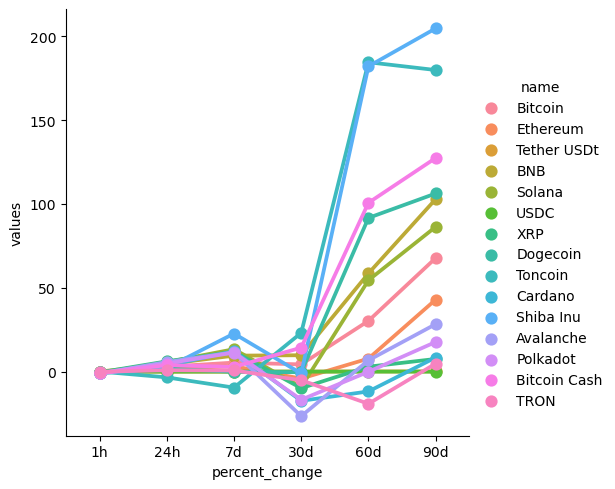

In [33]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [36]:
df8 = df[['name','quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,66839.89451,2024-04-22 20:00:24.089204


C:\Users\antay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\antay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

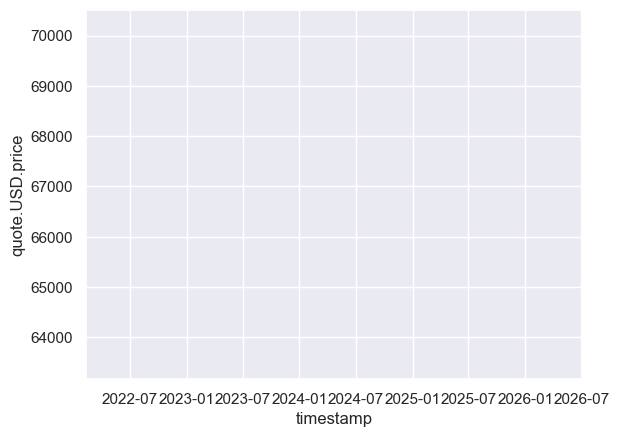

In [38]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df8)